=== Step 1: Loading Iris Dataset ===
Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Target distribution: [50 50 50]

=== Step 2: Data Exploration and Preprocessing ===
Missing values in features: 0
Missing values in target: 0

Dataset summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count  

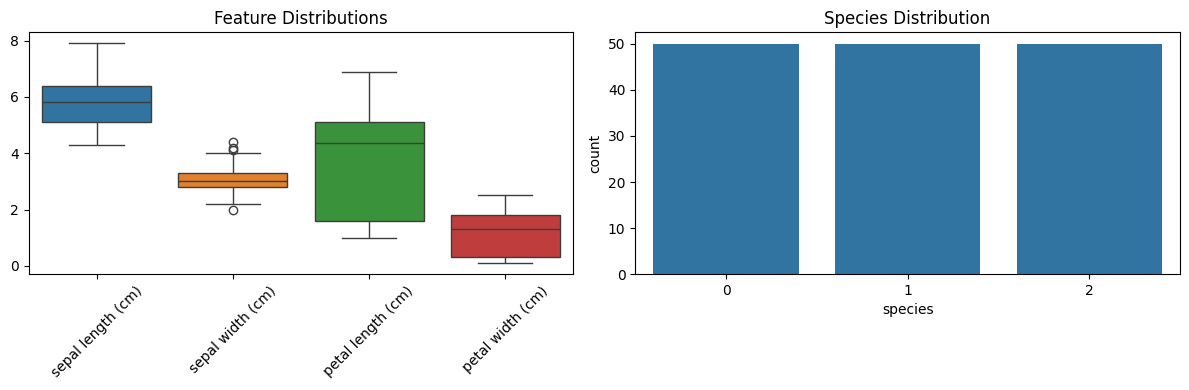


=== Step 3: Train-Test Split ===
Training set size: 105
Testing set size: 45
Training target distribution: [35 35 35]
Testing target distribution: [15 15 15]

=== Step 4: Feature Scaling ===
Feature scaling completed using StandardScaler

=== Step 5: Training Decision Tree Classifier ===
Decision Tree classifier trained successfully
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

=== Step 6: Making Predictions ===
Predictions completed

=== Step 7: Model Evaluation ===
Accuracy: 0.9778
Precision (weighted): 0.9792
Recall (weighted): 0.9778

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97

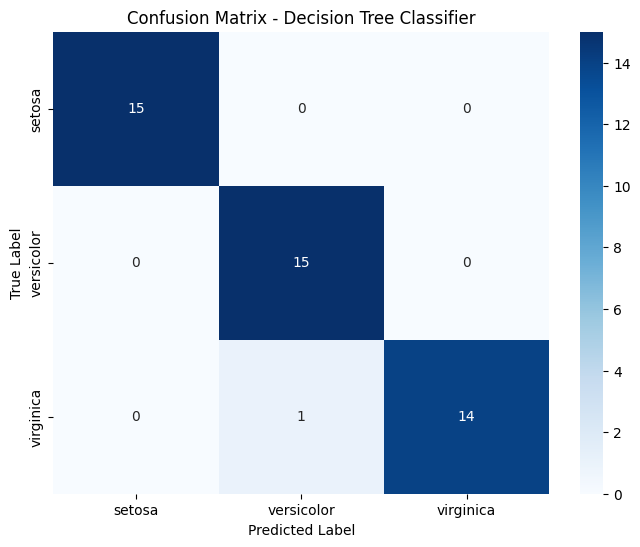


=== Step 8: Feature Importance Analysis ===
Feature Importance:
             Feature  Importance
2  petal length (cm)    0.550877
3   petal width (cm)    0.449123
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


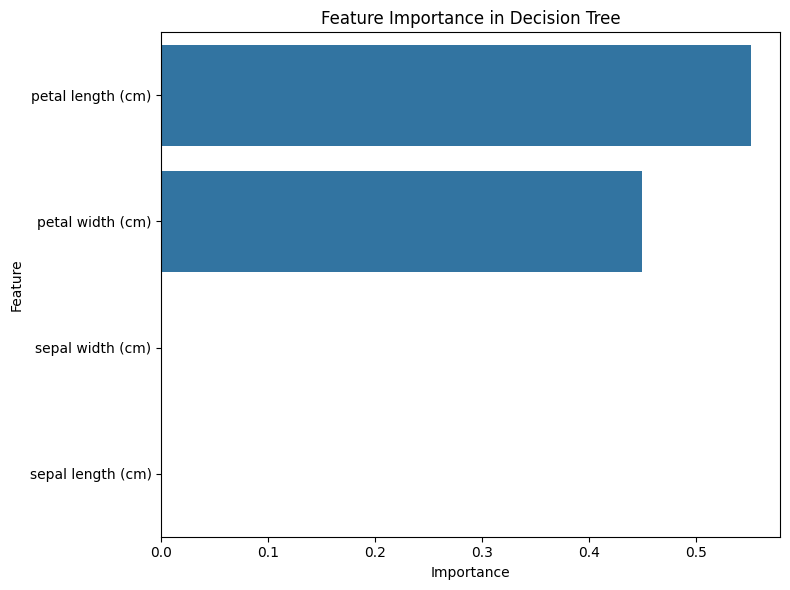


=== Step 9: Model Interpretation ===

Model Performance Summary:
The Decision Tree classifier achieved 97.8% accuracy on the test set.
The balanced precision and recall scores indicate good performance across all classes.
Most important feature for classification: petal length (cm)

Example Predictions:
Example 1: Actual=virginica, Predicted=virginica, Confidence=0.971
Example 2: Actual=virginica, Predicted=virginica, Confidence=0.971
Example 3: Actual=setosa, Predicted=setosa, Confidence=1.000

=== Task Completed Successfully ===


In [1]:
# Iris Species Classification with Decision Tree
# Classical Machine Learning using Scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
print("=== Step 1: Loading Iris Dataset ===")
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0: setosa, 1: versicolor, 2: virginica)

# Create DataFrame for better visualization
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {feature_names}")
print(f"Target names: {target_names}")
print(f"Target distribution: {np.bincount(y)}")

# Step 2: Data Exploration and Preprocessing
print("\n=== Step 2: Data Exploration and Preprocessing ===")

# Check for missing values
print(f"Missing values in features: {np.isnan(X).sum()}")
print(f"Missing values in target: {np.isnan(y).sum()}")

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

print("\nDataset summary:")
print(df.describe())

# Visualize the data distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df.drop('species', axis=1))
plt.title('Feature Distributions')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='species', data=df)
plt.title('Species Distribution')
plt.tight_layout()
plt.show()

# Step 3: Split the data into training and testing sets
print("\n=== Step 3: Train-Test Split ===")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Testing target distribution: {np.bincount(y_test)}")

# Step 4: Feature Scaling
print("\n=== Step 4: Feature Scaling ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed using StandardScaler")

# Step 5: Train Decision Tree Classifier
print("\n=== Step 5: Training Decision Tree Classifier ===")
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3  # Limiting depth to prevent overfitting
)

# Train the model
dt_classifier.fit(X_train_scaled, y_train)

print("Decision Tree classifier trained successfully")
print(f"Model parameters: {dt_classifier.get_params()}")

# Step 6: Make Predictions
print("\n=== Step 6: Making Predictions ===")
y_pred = dt_classifier.predict(X_test_scaled)
y_pred_proba = dt_classifier.predict_proba(X_test_scaled)

print("Predictions completed")

# Step 7: Model Evaluation
print("\n=== Step 7: Model Evaluation ===")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 8: Feature Importance Analysis
print("\n=== Step 8: Feature Importance Analysis ===")
feature_importance = dt_classifier.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

# Step 9: Model Interpretation
print("\n=== Step 9: Model Interpretation ===")
print("\nModel Performance Summary:")
print(f"The Decision Tree classifier achieved {accuracy:.1%} accuracy on the test set.")
print("The balanced precision and recall scores indicate good performance across all classes.")
print(f"Most important feature for classification: {importance_df.iloc[0]['Feature']}")

# Display some example predictions
print("\nExample Predictions:")
example_indices = [0, 5, 10]  # Some test examples
for i, idx in enumerate(example_indices):
    actual = target_names[y_test[idx]]
    predicted = target_names[y_pred[idx]]
    confidence = np.max(y_pred_proba[idx])

    print(f"Example {i+1}: Actual={actual}, Predicted={predicted}, Confidence={confidence:.3f}")

print("\n=== Task Completed Successfully ===")